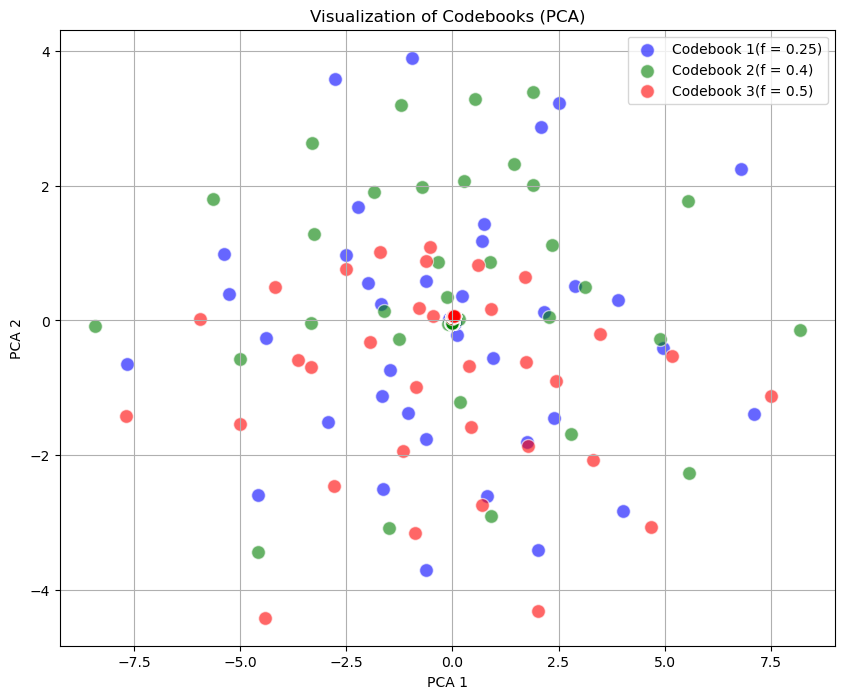

/home/exouser/miniconda3/envs/vqvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/exouser/miniconda3/envs/vqvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/exouser/miniconda3/envs/vqvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


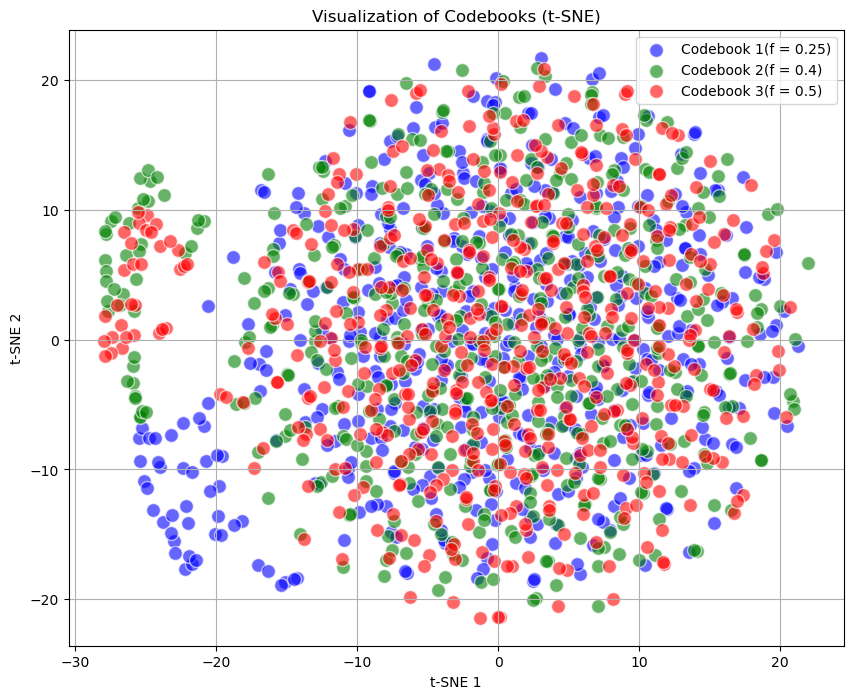

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

def reduce_dimensionality_pca(codebooks, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_codebooks = [pca.fit_transform(codebook) for codebook in codebooks]
    return reduced_codebooks

def reduce_dimensionality_tsne(codebooks, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42, perplexity=30, n_iter=1000)
    reduced_codebooks = [tsne.fit_transform(codebook) for codebook in codebooks]
    return reduced_codebooks

def visualize_codebooks(reduced_codebooks, labels, title, method_name):
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'red'] 
    for i, codebook in enumerate(reduced_codebooks):
        plt.scatter(codebook[:, 0], codebook[:, 1], label=labels[i], c=colors[i], alpha=0.6, edgecolors='w', s=100)
    
    plt.title(f"{title} ({method_name})")
    plt.xlabel(f"{method_name} 1")
    plt.ylabel(f"{method_name} 2")
    plt.legend()
    plt.grid(True)
    plt.show()

def load_codebooks(file_paths):
    codebooks = []
    for path in file_paths:
        if os.path.exists(path):
            codebook = np.load(path)
            codebooks.append(codebook)
        else:
            print(f"Error: File not found at {path}")
    return codebooks

def visualize_codebooks_from_paths(file_paths, labels):
    codebooks = load_codebooks(file_paths)
    
    if len(codebooks) != len(labels):
        print("Error: The number of codebooks does not match the number of labels.")
        return
    
    reduced_codebooks_pca = reduce_dimensionality_pca(codebooks)
    visualize_codebooks(reduced_codebooks_pca, labels, "Visualization of Codebooks", "PCA")
    
    reduced_codebooks_tsne = reduce_dimensionality_tsne(codebooks)
    visualize_codebooks(reduced_codebooks_tsne, labels, "Visualization of Codebooks", "t-SNE")

file_paths = ["../results/Inpainting Fraction = 0.25/codebook_inpainting_0.25.npy", "../results/Inpainting Fraction = 0.4/codebook_inpainting_0.4.npy", "../results/Inpainting Fraction = 0.5/codebook_inpainting_0.5.npy"]  # Replace with actual file paths

labels = ["Codebook 1(f = 0.25)", "Codebook 2(f = 0.4)", "Codebook 3(f = 0.5)"]

visualize_codebooks_from_paths(file_paths, labels)


In [2]:
codebook1 = np.load("../results/Inpainting Fraction = 0.25/codebook_inpainting_0.25.npy")
codebook2 = np.load("../results/Inpainting Fraction = 0.4/codebook_inpainting_0.4.npy")
codebook3 = np.load("../results/Inpainting Fraction = 0.5/codebook_inpainting_0.5.npy")

mean1 = np.mean(codebook1, axis=0)
mean2 = np.mean(codebook2, axis=0)
mean3 = np.mean(codebook3, axis=0)



FileNotFoundError: [Errno 2] No such file or directory: '../results/Inpainting Fraction = 0.25/mean_codebook_inpainting_0.25.npy'